In [3]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import random

In [4]:
import gc
gc.collect()

0

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.precision', 3)

In [6]:
folder = "D:\Personal\Data Science\Datasets\Makemytrip_chlg\dataset"
seed = 40

In [7]:
print(os.listdir(os.path.join(folder)))

['sample_submission.csv', 'submission2.csv', 'submission_1.csv', 'test.csv', 'train.csv']


In [8]:
df = pd.read_csv(os.path.join(folder,'train.csv'))

In [9]:
df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [10]:
df.set_index('id',inplace=True)

In [11]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
id,,,,,,,,,,,,,,,,
1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [12]:
df.shape

(552, 16)

In [13]:
df.P.value_counts()

1    305
0    247
Name: P, dtype: int64

In [14]:
random.seed(seed)

In [15]:
#Split into train and test set
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size =0.2,random_state = seed)

In [16]:
train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
id,,,,,,,,,,,,,,,,
524,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0.0,50,1
324,b,33.58,2.750,u,g,m,v,4.250,t,t,6,f,g,204.0,0,0
200,a,56.83,4.250,y,p,ff,ff,5.000,f,f,0,t,g,0.0,4,1
263,b,22.17,12.125,u,g,c,v,3.335,f,t,2,t,g,180.0,173,1
257,a,29.58,1.750,y,p,k,v,1.250,f,f,0,t,g,280.0,0,1


In [17]:
train.P.value_counts()

1    246
0    195
Name: P, dtype: int64

In [18]:
test.P.value_counts()

1    59
0    52
Name: P, dtype: int64

In [19]:
#Explore train dataset
train.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'], dtype='object')

In [20]:
train_X = train.drop(['P'],axis = 1)

In [21]:
train_Y = train['P']

In [22]:
train_X.dtypes

A     object
B    float64
C    float64
D     object
E     object
F     object
G     object
H    float64
I     object
J     object
K      int64
L     object
M     object
N    float64
O      int64
dtype: object

In [23]:
for col in train_X.columns:
    if train_X[col].dtype == object:
        print(col," : ",train_X[col].unique())

A  :  ['a' 'b' nan]
D  :  ['u' 'y' nan 'l']
E  :  ['g' 'p' nan 'gg']
F  :  ['ff' 'm' 'c' 'k' 'e' 'x' 'i' nan 'd' 'q' 'aa' 'w' 'j' 'cc' 'r']
G  :  ['ff' 'v' 'z' 'h' nan 'bb' 'dd' 'j' 'o' 'n']
I  :  ['f' 't']
J  :  ['f' 't']
L  :  ['f' 't']
M  :  ['g' 'p' 's']


In [24]:
def null(df):
    for column in df.columns:
        print("{0:25s} has {1} null values".format(column,sum(df[column].isnull() == 1)))

In [25]:
train_X.describe()

,B,C,H,K,N,O
count,434.000,441.000,441.000,441.000,432.000,441.000
mean,31.215,4.832,2.337,2.376,175.769,1219.644
std,11.814,5.016,3.597,4.423,154.454,6369.474
min,13.750,0.000,0.000,0.000,0.000,0.000
25%,22.420,1.000,0.210,0.000,60.000,0.000
50%,28.210,2.835,1.000,0.000,151.000,5.000
75%,37.457,7.835,3.000,3.000,272.000,484.000
max,80.250,28.000,28.500,40.000,1160.000,100000.000


In [26]:
for col in train_X.columns:
    if train_X[col].dtype == object:
        print(train_X[col].value_counts())

b    293
a    141
Name: A, dtype: int64
u    338
y     97
l      2
Name: D, dtype: int64
g     338
p      97
gg      2
Name: E, dtype: int64
c     88
q     56
w     39
i     38
aa    35
ff    33
m     29
k     29
x     26
cc    23
d     20
e     13
j      6
r      1
Name: F, dtype: int64
v     249
h      99
bb     37
ff     36
j       4
z       4
dd      3
o       2
n       2
Name: G, dtype: int64
t    228
f    213
Name: I, dtype: int64
f    255
t    186
Name: J, dtype: int64
f    243
t    198
Name: L, dtype: int64
g    398
s     37
p      6
Name: M, dtype: int64


In [27]:
null(train_X)

A                         has 7 null values
B                         has 7 null values
C                         has 0 null values
D                         has 4 null values
E                         has 4 null values
F                         has 5 null values
G                         has 5 null values
H                         has 0 null values
I                         has 0 null values
J                         has 0 null values
K                         has 0 null values
L                         has 0 null values
M                         has 0 null values
N                         has 9 null values
O                         has 0 null values


In [28]:
#Impute null values
from sklearn.preprocessing import Imputer

In [29]:
for col in train_X.columns:
    print(col," : ",train_X[train_X[col].isnull() == 1].index)

A  :  Int64Index([436, 333, 36, 192, 149, 297, 237], dtype='int64', name='id')
B  :  Int64Index([142, 313, 114, 428, 352, 315, 185], dtype='int64', name='id')
C  :  Int64Index([], dtype='int64', name='id')
D  :  Int64Index([214, 539, 303, 474], dtype='int64', name='id')
E  :  Int64Index([214, 539, 303, 474], dtype='int64', name='id')
F  :  Int64Index([214, 539, 303, 91, 474], dtype='int64', name='id')
G  :  Int64Index([214, 539, 303, 91, 474], dtype='int64', name='id')
H  :  Int64Index([], dtype='int64', name='id')
I  :  Int64Index([], dtype='int64', name='id')
J  :  Int64Index([], dtype='int64', name='id')
K  :  Int64Index([], dtype='int64', name='id')
L  :  Int64Index([], dtype='int64', name='id')
M  :  Int64Index([], dtype='int64', name='id')
N  :  Int64Index([214, 539, 313, 303, 228, 463, 408, 474, 388], dtype='int64', name='id')
O  :  Int64Index([], dtype='int64', name='id')


In [30]:
train_X[train_X['A'].isnull() == 1]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
id,,,,,,,,,,,,,,,
436,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,160.0,234
333,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0
36,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300.0,0
192,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0
149,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444
297,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372.0,122
237,NaN,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,200.0,141


In [31]:
train_X[train_X['A'].isnull() == 0].head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
id,,,,,,,,,,,,,,,
524,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0.0,50
324,b,33.58,2.750,u,g,m,v,4.250,t,t,6,f,g,204.0,0
200,a,56.83,4.250,y,p,ff,ff,5.000,f,f,0,t,g,0.0,4
263,b,22.17,12.125,u,g,c,v,3.335,f,t,2,t,g,180.0,173
257,a,29.58,1.750,y,p,k,v,1.250,f,f,0,t,g,280.0,0


In [32]:
train_X[train_X['B'].isnull() == 1]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
id,,,,,,,,,,,,,,,
142,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0
313,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200
114,b,NaN,3.000,y,p,i,bb,7.000,f,f,0,f,g,0.0,1
428,a,NaN,3.500,u,g,d,v,3.000,t,f,0,t,g,300.0,0
352,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0
315,b,NaN,10.500,u,g,x,v,6.500,t,f,0,f,g,0.0,0
185,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010


In [37]:
median = {}
for col in train_X.columns:
    if train_X[col].dtype != object:
        median[col] = np.median(train_X[col].dropna())

In [38]:
for col in train_X.columns:
    if train_X[col].dtype == object:
        train_X[col] = train_X[col].apply(lambda x: 'na' if pd.isnull(x) else x)
    else:
        train_X[col] = train_X[col].apply(lambda x: median[col] if pd.isnull(x) else x)

In [39]:
null(train_X)

A                         has 0 null values
B                         has 0 null values
C                         has 0 null values
D                         has 0 null values
E                         has 0 null values
F                         has 0 null values
G                         has 0 null values
H                         has 0 null values
I                         has 0 null values
J                         has 0 null values
K                         has 0 null values
L                         has 0 null values
M                         has 0 null values
N                         has 0 null values
O                         has 0 null values


In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    facet.set_xticklabels()
    plt.show()

In [42]:
full = pd.concat( [ train_X , train_Y ] , axis=1 )

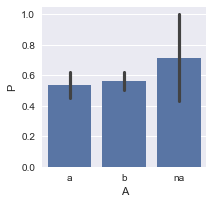

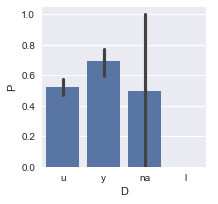

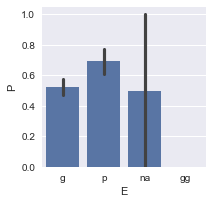

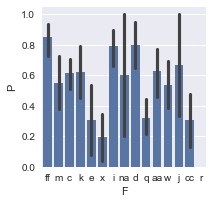

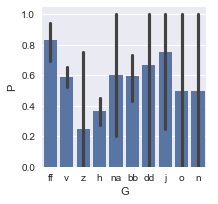

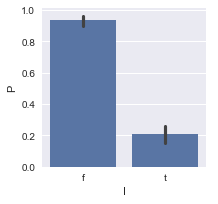

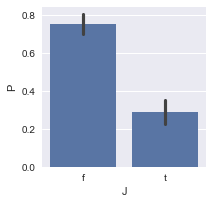

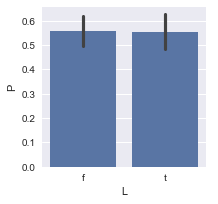

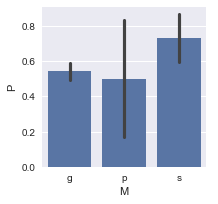

In [43]:
for col in train_X.columns:
    if train_X[col].dtype == object:
        plot_categories( full , cat = col , target = 'P' )

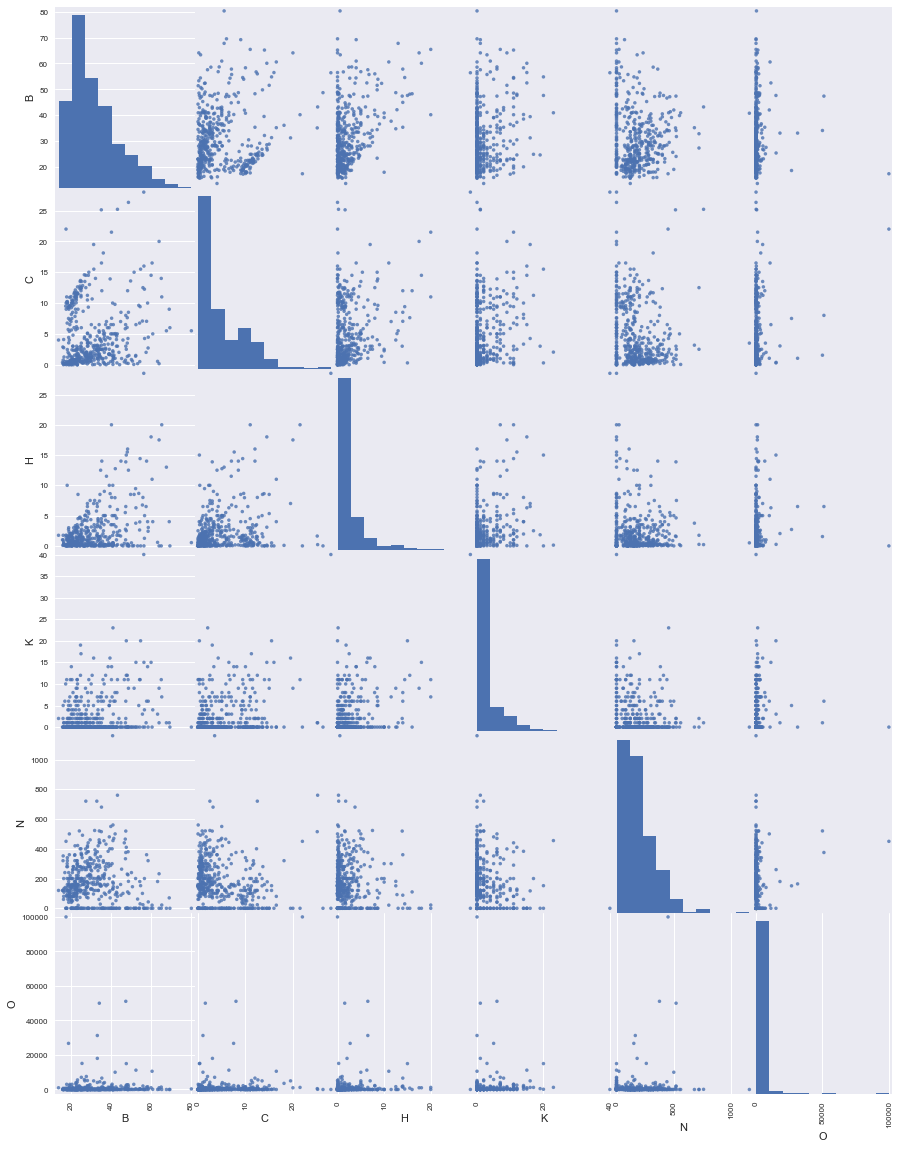

In [44]:
pd.plotting.scatter_matrix(train_X, alpha=0.8, figsize = (15,20),diagonal='hist')
plt.show()

In [45]:
#All features are skewed

In [46]:
cat = []
num = []
for col in train_X.columns:
    if train_X[col].dtype == object:
        cat.append(col)     
    else:
        num.append(col)

In [47]:
cat

['A', 'D', 'E', 'F', 'G', 'I', 'J', 'L', 'M']

In [48]:
num

['B', 'C', 'H', 'K', 'N', 'O']

In [49]:
df_cat = train_X[cat]

In [50]:
df_num = train_X[num]

In [51]:
from scipy.stats import chi2_contingency

In [52]:
chitest = chi2_contingency(pd.crosstab(train_X['D'], train_X['E']))

In [53]:
chitest

(1323.0,
 3.3320452677667933e-279,
 9,
 array([[  1.53287982e+00,   9.07029478e-03,   1.81405896e-02,
           4.39909297e-01],
        [  3.06575964e+00,   1.81405896e-02,   3.62811791e-02,
           8.79818594e-01],
        [  2.59056689e+02,   1.53287982e+00,   3.06575964e+00,
           7.43446712e+01],
        [  7.43446712e+01,   4.39909297e-01,   8.79818594e-01,
           2.13356009e+01]]))

In [54]:
chi2, p_values =[], []
for i in range(len(df_cat.columns)):
    for j in range(len(df_cat.columns)):
        if j > i:
            chitest = chi2_contingency(pd.crosstab(df_cat[df_cat.columns[i]], df_cat[df_cat.columns[j]]))
            chi2.append(chitest[0])
            p_values.append(chitest[1])
        else:      # for same factor pair
            chi2.append(0)
            p_values.append(0)
            
'''
Crosstab will create contingency table for the pair of features. 
Null hypothesis is that the features are independent of each other. 
If p value is less than significance value, i.e < 0.01 then we can reject Null hypothesis and
accept alternate hypothesis which stats that the features are related.
'''                     
chi2 = np.array(chi2).reshape((df_cat.shape[1],df_cat.shape[1])) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=df_cat.columns.values, columns=df_cat.columns.values)
p_values = np.array(p_values).reshape((df_cat.shape[1],df_cat.shape[1])) # shape it as a matrix
p_values = pd.DataFrame(p_values, index=df_cat.columns.values, columns=df_cat.columns.values)

In [55]:
chi2

,A,D,E,F,G,I,J,L,M
A,0.0,5.133,5.133,85.989,38.775,2.832,4.203,1.120e+00,6.617
D,0.0,0.000,1323.000,379.550,475.715,11.657,17.467,7.843e+00,336.532
E,0.0,0.000,0.000,379.550,475.715,11.657,17.467,7.843e+00,336.532
F,0.0,0.000,0.000,0.000,1528.561,55.850,41.494,1.404e+01,265.912
G,0.0,0.000,0.000,0.000,0.000,40.479,17.810,1.013e+01,280.745
I,0.0,0.000,0.000,0.000,0.000,0.000,86.997,3.061e+00,12.977
J,0.0,0.000,0.000,0.000,0.000,0.000,0.000,3.913e-06,24.346
L,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,2.144
M,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000


In [56]:
p_values

,A,D,E,F,G,I,J,L,M
A,0.0,0.527,5.268e-01,8.289e-08,3.055e-03,2.427e-01,1.223e-01,0.571,1.576e-01
D,0.0,0.000,3.332e-279,6.436e-56,1.563e-83,8.655e-03,5.666e-04,0.049,1.200e-69
E,0.0,0.000,0.000e+00,6.436e-56,1.563e-83,8.655e-03,5.666e-04,0.049,1.200e-69
F,0.0,0.000,0.000e+00,0.000e+00,2.386e-239,6.182e-07,1.487e-04,0.446,1.307e-40
G,0.0,0.000,0.000e+00,0.000e+00,0.000e+00,6.221e-06,3.744e-02,0.340,4.316e-49
I,0.0,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.087e-20,0.080,1.521e-03
J,0.0,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.998,5.168e-06
L,0.0,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,3.423e-01
M,0.0,0.000,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,0.000e+00


In [57]:
pd.crosstab(df_cat['D'], df_cat['E'])

E,g,gg,na,p
D,,,,
l,0,2,0,0
na,0,0,4,0
u,338,0,0,0
y,0,0,0,97


In [58]:
pd.crosstab(df_cat['F'], df_cat['G'])

G,bb,dd,ff,h,j,n,na,o,v,z
F,,,,,,,,,,
aa,2,0,0,1,0,0,0,0,32,0
c,9,0,0,18,0,1,0,0,60,0
cc,1,0,1,7,0,0,0,0,14,0
d,1,0,0,6,0,0,0,0,13,0
e,1,3,0,2,0,0,0,0,3,4
ff,0,0,32,0,0,0,0,1,0,0
i,19,0,0,7,0,0,0,1,11,0
j,0,0,2,0,4,0,0,0,0,0
k,1,0,1,9,0,0,0,0,18,0


In [59]:
pd.crosstab(df_cat['I'], df_cat['J'])

J,f,t
I,,
f,172,41
t,83,145


In [60]:
pd.crosstab(df_cat['I'], df_cat['L'])

L,f,t
I,,
f,127,86
t,116,112


In [61]:
from scipy.stats import ranksums
z, p_ranksum =[], []
for i in range(len(df_num.columns)):
    for j in range(len(df_num.columns)):
        if j > i:
            rank_test = ranksums(df_num[df_num.columns[i]], df_num[df_num.columns[j]])
            z.append(rank_test[0])
            p_ranksum.append(rank_test[1])
        else:      # for same factor pair
            z.append(0)
            p_ranksum.append(0)
            
'''
Null hypothesis is that two distributions are same.
If p value is less than significance value, i.e < 0.01 then we can reject Null hypothesis and
accept alternate hypothesis which stats that the distributions significantly differ.
'''                     
z = np.array(z).reshape((df_num.shape[1],df_num.shape[1])) # shape it as a matrix
z = pd.DataFrame(z, index=df_num.columns.values, columns=df_num.columns.values)
p_ranksum = np.array(p_ranksum).reshape((df_num.shape[1],df_num.shape[1])) # shape it as a matrix
p_ranksum = pd.DataFrame(p_ranksum, index=df_num.columns.values, columns=df_num.columns.values)

In [62]:
p_ranksum

,B,C,H,K,N,O
B,0.0,2.138e-142,1.495e-144,9.713e-144,8.606e-49,5.375e-04
C,0.0,0.000e+00,1.302e-22,1.301e-37,4.130e-54,2.228e-01
H,0.0,0.000e+00,0.000e+00,6.092e-14,1.503e-56,1.110e-03
K,0.0,0.000e+00,0.000e+00,0.000e+00,5.107e-75,3.473e-18
N,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.453e-04
O,0.0,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00


In [63]:
train_X.drop('E',axis=1, inplace=True)

In [64]:
numeric_feats = train_X.dtypes[train_X.dtypes != "object"].index

In [65]:
numeric_feats

Index(['B', 'C', 'H', 'K', 'N', 'O'], dtype='object')

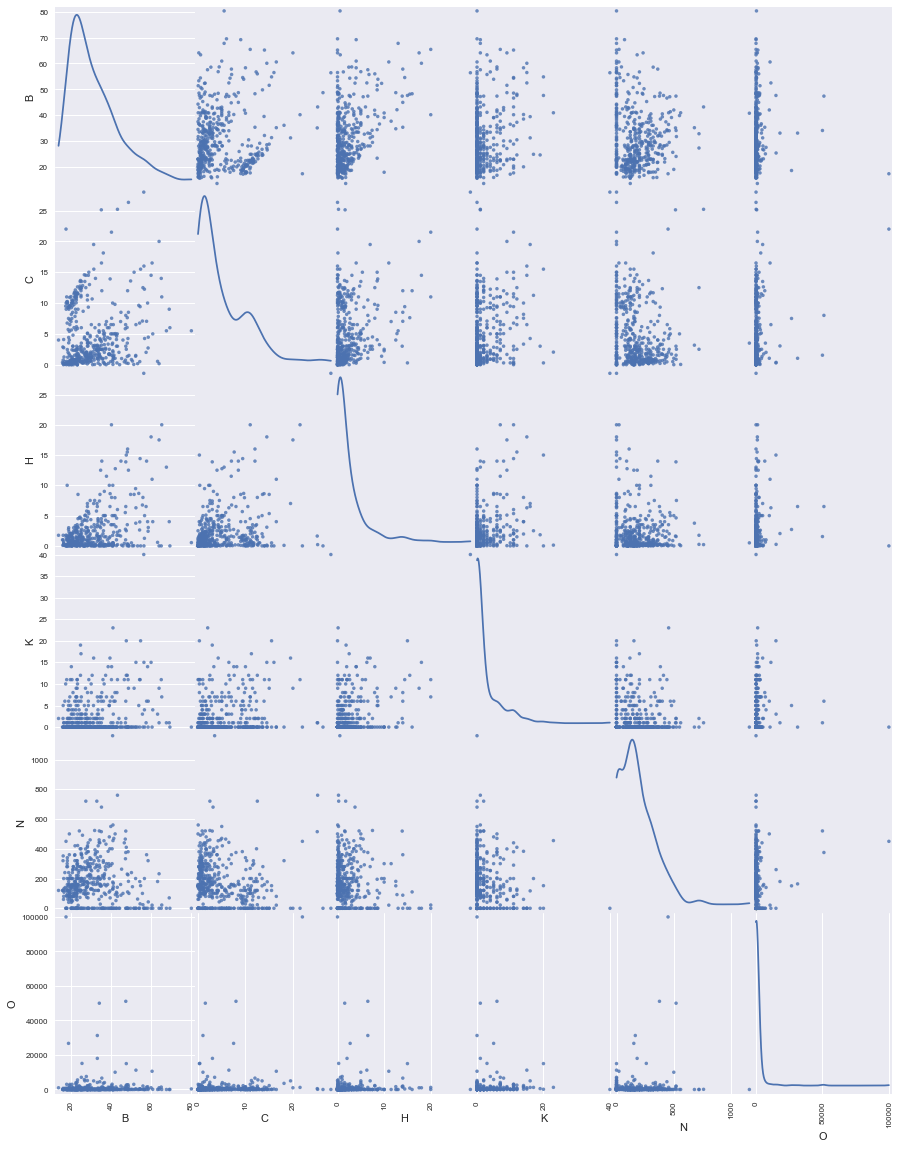

In [66]:
pd.plotting.scatter_matrix(train_X, alpha=0.8, figsize = (15,20),diagonal='kde')
plt.show()

In [67]:
def plot_col(train_X,numeric_feats):
    for col in train_X[numeric_feats].columns:
        sns.kdeplot(train_X[col])
        plt.show()

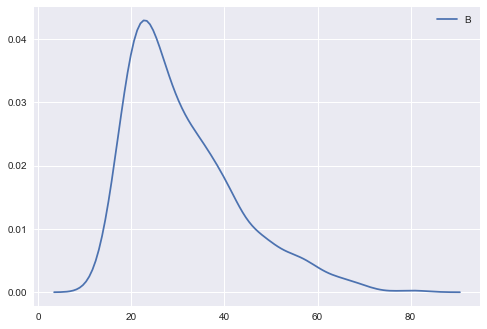

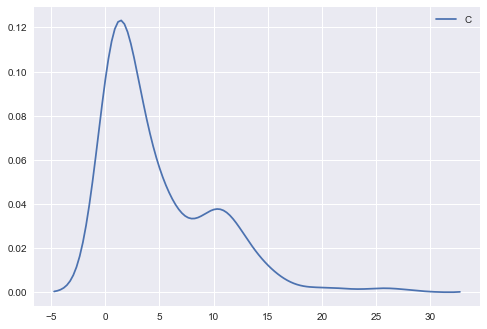

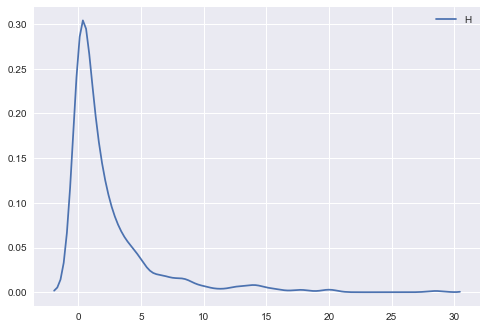

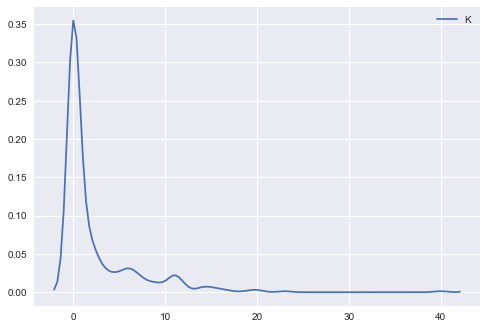

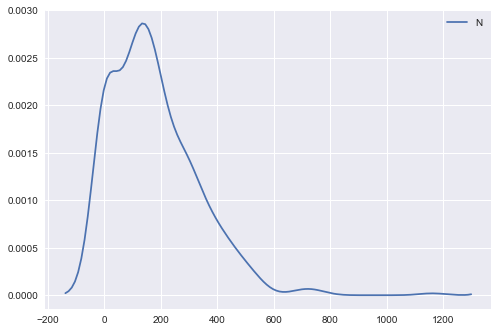

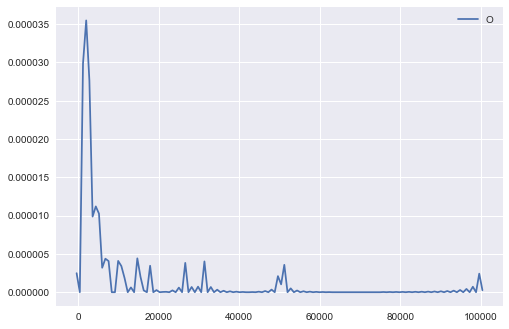

In [68]:
plot_col(train_X,numeric_feats)

In [69]:
from scipy.stats import skew,boxcox

In [70]:
train_X_orig = train_X.copy()

In [135]:
train_X = train_X_orig.copy()

In [136]:
skewed_feats = train_X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

In [137]:
skewed_feats

B     1.128
C     1.464
H     2.972
K     3.014
N     1.358
O    11.103
dtype: float64

In [138]:
#log transform skewed numeric features:

skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

train_X[skewed_feats] = train_X[skewed_feats].apply(lambda x: np.log(1 + np.log(2 + x))) #as we have -1 as minimum value

In [139]:
skewed_feats = train_X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats

B    0.317
C    0.033
H    0.739
K    0.960
N   -1.369
O    0.211
dtype: float64

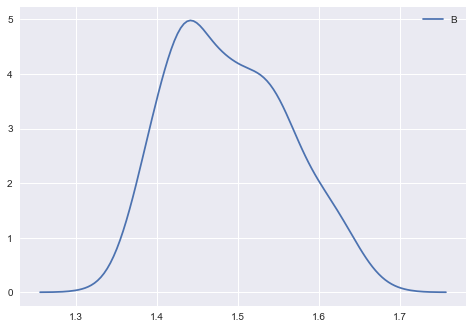

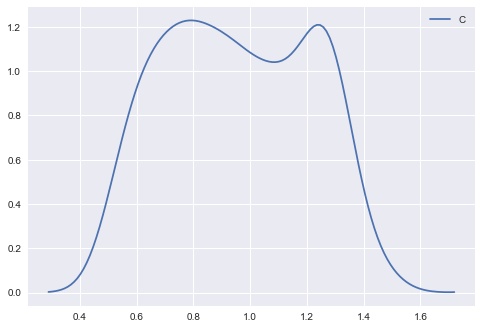

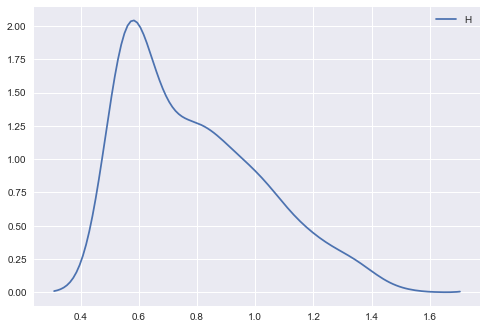

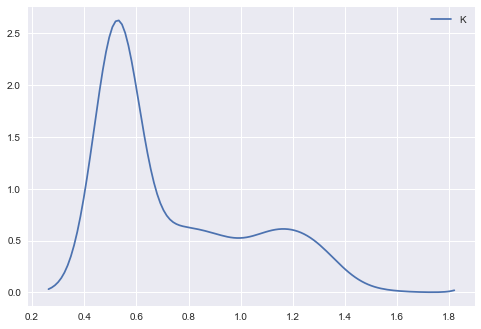

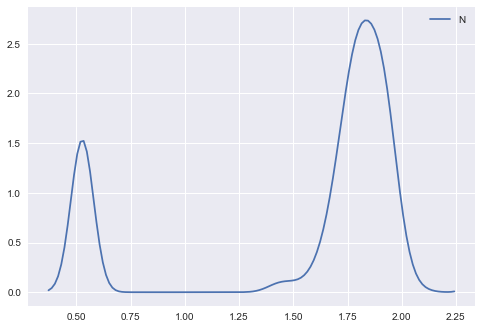

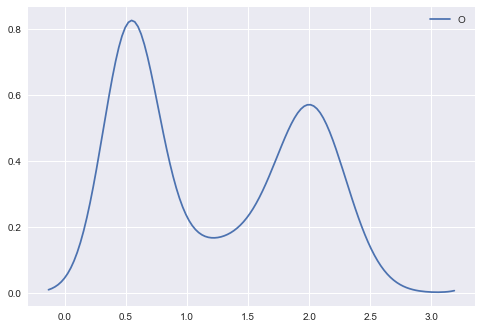

In [140]:
plot_col(train_X,numeric_feats)

In [141]:
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer 

In [142]:
dict_cat ={}
for col in train_X.columns:
    if train_X[col].dtype == object:        
        dict_cat[col] = pd.get_dummies( train_X[col] , prefix=col )
        
#Find unique values and if count is more than 10 then create a column
'''
uniq = list(train_X['A'].unique())
        for u in uniq:
            if (train_X[train_X['A'] == 'a'].shape[0] > 10):
                #create columns
            else:
                
'''

"\nuniq = list(train_X['A'].unique())\n        for u in uniq:\n            if (train_X[train_X['A'] == 'a'].shape[0] > 10):\n                #create columns\n            else:\n                \n"

In [143]:
for k in dict_cat.keys():
    print(k,": ",dict_cat[k].columns)

A :  Index(['A_a', 'A_b', 'A_na'], dtype='object')
D :  Index(['D_l', 'D_na', 'D_u', 'D_y'], dtype='object')
F :  Index(['F_aa', 'F_c', 'F_cc', 'F_d', 'F_e', 'F_ff', 'F_i', 'F_j', 'F_k', 'F_m', 'F_na', 'F_q', 'F_r', 'F_w', 'F_x'], dtype='object')
G :  Index(['G_bb', 'G_dd', 'G_ff', 'G_h', 'G_j', 'G_n', 'G_na', 'G_o', 'G_v', 'G_z'], dtype='object')
I :  Index(['I_f', 'I_t'], dtype='object')
J :  Index(['J_f', 'J_t'], dtype='object')
L :  Index(['L_f', 'L_t'], dtype='object')
M :  Index(['M_g', 'M_p', 'M_s'], dtype='object')


In [144]:
#delete one column for all categorical dummies to avoid multi-collinearity
one_drop = ['A_a','D_y','F_q','G_h','I_f','J_f','L_f','M_s']

In [145]:
full_X = pd.concat( [ train_X[numeric_feats] , dict_cat['A'],dict_cat['D'],dict_cat['F'],dict_cat['G'],dict_cat['I'],dict_cat['J'],dict_cat['L'],dict_cat['M'] ] , axis=1 )

In [146]:
full_X.drop(one_drop,axis=1,inplace=True)

In [147]:
full_X.drop(['D_l', 'F_r', 'G_dd', 'G_n', 'G_o'],axis=1,inplace=True)

In [148]:
full_X.head()

,B,C,H,K,N,O,A_b,A_na,D_na,D_u,F_aa,F_c,F_cc,F_d,F_e,F_ff,F_i,F_j,F_k,F_m,F_na,F_w,F_x,G_bb,G_ff,G_j,G_na,G_v,G_z,I_t,J_t,L_t,M_g,M_p
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,1.384,1.253,0.527,0.527,0.527,1.600,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
324,1.520,0.939,1.041,1.125,1.845,0.527,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
200,1.624,1.041,1.080,0.527,0.527,1.027,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
263,1.432,1.294,0.984,0.870,1.825,1.819,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
257,1.493,0.842,0.779,0.527,1.893,0.527,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [150]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(full_X)

In [152]:
for n in range (1,10):
    estimator = RandomForestClassifier(random_state=seed, n_estimators=20*n)
    score = cross_val_score(estimator, X_train_scaled, train_Y).mean()
    print(20*n, " : ", score)

20  :  0.87074829932
40  :  0.873015873016
60  :  0.875283446712
80  :  0.868480725624
100  :  0.863945578231
120  :  0.87074829932
140  :  0.868480725624
160  :  0.866213151927
180  :  0.868480725624


In [153]:
for n in range (1,10):
    estimator = GradientBoostingClassifier(random_state=seed, n_estimators=20*n)
    score = cross_val_score(estimator, X_train_scaled, train_Y).mean()
    print(20*n, " : ", score)

20  :  0.861678004535
40  :  0.861678004535
60  :  0.863945578231
80  :  0.875283446712
100  :  0.873015873016
120  :  0.868480725624
140  :  0.87074829932
160  :  0.87074829932
180  :  0.868480725624


In [154]:
model = RandomForestClassifier(random_state=seed, n_estimators=60)
model.fit(X_train_scaled, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=1, oob_score=False, random_state=40,
            verbose=0, warm_start=False)

In [159]:
#predict for test

#Transform test data
test_X = test.drop(['P'],axis = 1)
test_Y = test['P']
null(test_X)

A                         has 1 null values
B                         has 2 null values
C                         has 0 null values
D                         has 1 null values
E                         has 1 null values
F                         has 2 null values
G                         has 2 null values
H                         has 0 null values
I                         has 0 null values
J                         has 0 null values
K                         has 0 null values
L                         has 0 null values
M                         has 0 null values
N                         has 2 null values
O                         has 0 null values


In [160]:
#Handling null values
for col in test_X.columns:
    if test_X[col].dtype == object:
        test_X[col] = test_X[col].apply(lambda x: 'na' if pd.isnull(x) else x)
    else:
        test_X[col] = test_X[col].apply(lambda x: np.median(test_X[col].dropna()) if pd.isnull(x) else x)

null(test_X)

A                         has 0 null values
B                         has 0 null values
C                         has 0 null values
D                         has 0 null values
E                         has 0 null values
F                         has 0 null values
G                         has 0 null values
H                         has 0 null values
I                         has 0 null values
J                         has 0 null values
K                         has 0 null values
L                         has 0 null values
M                         has 0 null values
N                         has 0 null values
O                         has 0 null values


In [161]:
test_X.drop('E',axis=1, inplace=True)
numeric_feats = test_X.dtypes[test_X.dtypes != "object"].index
skewed_feats = test_X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

test_X[skewed_feats] = test_X[skewed_feats].apply(lambda x: np.log(1 + np.log(2 + x)))
dict_cat ={}
for col in test_X.columns:
    if test_X[col].dtype == object:
        dict_cat[col] = pd.get_dummies( test_X[col] , prefix=col )
full_test_X = pd.concat( [ test_X[numeric_feats] ,dict_cat['A'],dict_cat['D'],dict_cat['F'],dict_cat['G'],dict_cat['I'],dict_cat['J'],dict_cat['L'],dict_cat['M'] ] , axis=1 )


In [162]:
full_X.columns

Index(['B', 'C', 'H', 'K', 'N', 'O', 'A_b', 'A_na', 'D_na', 'D_u', 'F_aa', 'F_c', 'F_cc', 'F_d', 'F_e', 'F_ff', 'F_i', 'F_j', 'F_k', 'F_m', 'F_na', 'F_w', 'F_x', 'G_bb', 'G_ff', 'G_j', 'G_na', 'G_v', 'G_z', 'I_t', 'J_t', 'L_t', 'M_g', 'M_p'], dtype='object')

In [163]:
full_test_X.drop(one_drop,axis=1,inplace=True)
full_test_X.columns

Index(['B', 'C', 'H', 'K', 'N', 'O', 'A_b', 'A_na', 'D_na', 'D_u', 'F_aa', 'F_c', 'F_cc', 'F_d', 'F_e', 'F_ff', 'F_i', 'F_j', 'F_k', 'F_m', 'F_na', 'F_w', 'F_x', 'G_bb', 'G_ff', 'G_j', 'G_na', 'G_v', 'G_z', 'I_t', 'J_t', 'L_t', 'M_g', 'M_p'], dtype='object')

In [164]:
add_cols = []
col2 = full_test_X.columns
issue = False
for col1 in full_X.columns:
    if col1 not in col2:
        add_cols.append(col1)
        issue = True
if issue == False:
    print("All columns are there")
add_cols

All columns are there


[]

In [165]:
for col in add_cols:
    full_test_X[col] = pd.Series(np.zeros(df.shape[0]))

In [166]:
full_test_X.head(10)

,B,C,H,K,N,O,A_b,A_na,D_na,D_u,F_aa,F_c,F_cc,F_d,F_e,F_ff,F_i,F_j,F_k,F_m,F_na,F_w,F_x,G_bb,G_ff,G_j,G_na,G_v,G_z,I_t,J_t,L_t,M_g,M_p
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
103,1.512,0.995,0.650,0.527,1.865,0.527,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
282,1.621,1.282,1.080,1.080,0.527,2.311,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
1,1.390,1.258,0.562,0.527,1.759,1.936,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
541,1.476,0.676,0.641,0.527,1.842,0.527,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
201,1.555,1.133,0.538,0.741,1.842,1.904,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
351,1.563,0.748,0.683,0.527,1.870,1.868,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
16,1.486,1.011,0.594,0.741,1.556,1.800,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
482,1.444,0.972,0.632,0.741,1.893,1.688,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
174,1.481,0.817,1.011,1.080,1.727,0.959,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0


In [167]:
X_test_scaled = scaler.transform(full_test_X)

In [168]:
#pred_Y = model.predict(X_train_scaled)
model.score(X_test_scaled,test_Y)

0.87387387387387383

In [169]:
#Reducing overfitting
for n in range(1,20):
    model = RandomForestClassifier(random_state=seed, n_estimators=30,max_depth = n)
    model.fit(X_train_scaled, train_Y)
    print(n,model.score(X_train_scaled, train_Y)," : ",model.score(X_test_scaled,test_Y))

1 0.818594104308  :  0.783783783784
2 0.857142857143  :  0.828828828829
3 0.868480725624  :  0.855855855856
4 0.897959183673  :  0.882882882883
5 0.904761904762  :  0.882882882883
6 0.938775510204  :  0.846846846847
7 0.961451247166  :  0.873873873874
8 0.977324263039  :  0.882882882883
9 0.981859410431  :  0.900900900901
10 0.988662131519  :  0.864864864865
11 0.993197278912  :  0.891891891892
12 0.995464852608  :  0.864864864865
13 0.997732426304  :  0.864864864865
14 0.997732426304  :  0.900900900901
15 0.997732426304  :  0.891891891892
16 1.0  :  0.900900900901
17 1.0  :  0.891891891892
18 1.0  :  0.891891891892
19 1.0  :  0.891891891892


In [170]:
model = RandomForestClassifier(random_state=seed, n_estimators=30,max_depth = 4)
model.fit(X_train_scaled, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=40,
            verbose=0, warm_start=False)

In [171]:
#Now predict for test file

In [172]:
pred_df = pd.read_csv(os.path.join(folder,'test.csv'))

In [173]:
pred_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0


In [174]:
pred_df.set_index('id',inplace=True)

In [175]:
null(pred_df)

A                         has 4 null values
B                         has 3 null values
C                         has 0 null values
D                         has 1 null values
E                         has 1 null values
F                         has 2 null values
G                         has 2 null values
H                         has 0 null values
I                         has 0 null values
J                         has 0 null values
K                         has 0 null values
L                         has 0 null values
M                         has 0 null values
N                         has 2 null values
O                         has 0 null values


In [176]:
for col in pred_df.columns:
    if pred_df[col].dtype == object:
        pred_df[col] = pred_df[col].apply(lambda x: 'na' if pd.isnull(x) else x)
    else:
        pred_df[col] = pred_df[col].apply(lambda x: np.median(pred_df[col].dropna()) if pd.isnull(x) else x)

null(pred_df)

A                         has 0 null values
B                         has 0 null values
C                         has 0 null values
D                         has 0 null values
E                         has 0 null values
F                         has 0 null values
G                         has 0 null values
H                         has 0 null values
I                         has 0 null values
J                         has 0 null values
K                         has 0 null values
L                         has 0 null values
M                         has 0 null values
N                         has 0 null values
O                         has 0 null values


In [177]:
pred_df.drop('E',axis=1, inplace=True)
numeric_feats = pred_df.dtypes[pred_df.dtypes != "object"].index
skewed_feats = pred_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

pred_df[skewed_feats] = pred_df[skewed_feats].apply(lambda x: np.log(1 + np.log(2 + x)))
dict_cat ={}
for col in pred_df.columns:
    if pred_df[col].dtype == object:
        dict_cat[col] = pd.get_dummies( pred_df[col] , prefix=col )
full_pred_df = pd.concat( [ pred_df[numeric_feats] ,dict_cat['A'],dict_cat['D'],dict_cat['F'],dict_cat['G'],dict_cat['I'],dict_cat['J'],dict_cat['L'],dict_cat['M'] ] , axis=1 )


In [178]:
full_pred_df.drop(one_drop,axis=1,inplace=True)

In [179]:
full_pred_df.shape

(138, 37)

In [180]:
add_cols = []
col2 = full_X.columns
issue = False
for col1 in full_pred_df.columns:
    if col1 not in col2:
        add_cols.append(col1)
        issue = True
if issue == False:
    print("All columns are there")
add_cols

['F_r', 'G_dd', 'G_n']

In [181]:
full_pred_df.drop(['F_r', 'G_dd', 'G_n'],axis=1,inplace=True)

In [182]:
X_pred_scaled = scaler.transform(full_pred_df)
y_pred = model.predict(X_pred_scaled)

In [183]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [184]:
fin = pd.DataFrame(pd.Series(y_pred[:],index = full_pred_df.index ))
fin = fin.reset_index()
fin = fin.rename(columns = {0: 'P'})

In [185]:
fin.head()

,id,P
0,553,0
1,554,0
2,555,0
3,556,0
4,557,1


In [186]:
fin.to_csv(os.path.join(folder,'submission4.csv'),index=False)